# Generalized Linear Model

This notebook explores GLM with Python, for more information please look at http://scikit-learn.org/stable/modules/linear_model.html

In a typical linear model, we will fit data using Ordinary Least Square algorithm. The regression coefficients are estimated with assumptions of linear independence among factors. If data contain multi-colinearity, ordinary least square can be quite sensitive and give high variance in responses.

# Fitting linear regression to diabetes dataset

The dataset is retrieved from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html (the data served from some sklearn versions might already be standardized). Additional information about the data can be obtained there.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [2]:
df = pd.DataFrame(diabetes.data)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
df['target'] = diabetes.target

In [5]:
df.columns = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'target']

In [6]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
diabetes.data.shape

(442, 10)

In [8]:
diabetes.target.shape

(442,)

## Fitting linear regression with cross validation

The following code performs 5-fold cross validation fit with regression model on the diabetes data.

K-Fold cross validation is expensive computationally but does not waste data.

In [9]:
from sklearn.model_selection import cross_val_score

X = df.drop('target', axis=1)
y = df['target']

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X, y, cv=3, scoring='neg_mean_squared_error')
scores

array([-3034.23227477, -3253.22356717, -2793.97771848])

In [10]:
print("mse: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

mse: -3027.14 (+/- 375.11)


## Retrieving coefficients and intercept

In [11]:
fitted = regr.fit(X, y)

In [12]:
print('Coefficients: \n', fitted.coef_)

Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [13]:
print('Intercept: \n', fitted.intercept_)

Intercept: 
 152.133484163


## Regularized Linear Regression

In [14]:
regr = linear_model.Lasso()
scores = cross_val_score(regr, X, y, cv=3, scoring='neg_mean_squared_error')
scores
print("mse: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

mse: -3826.77 (+/- 462.04)


In [15]:
regr = linear_model.Ridge()
scores = cross_val_score(regr, X, y, cv=3, scoring='neg_mean_squared_error')
scores
print("mse: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

mse: -3494.30 (+/- 434.56)


# Logistic Regression

In [43]:
# import some data to play with
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [44]:
logreg = linear_model.LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
scores

array([ 0.93913043,  0.93913043,  0.97345133,  0.95575221,  0.96460177])

In [45]:
print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

accuracy: 0.95 (+/- 0.03)


Print classification report or calculate precision, recall, f1-score separately.

In [46]:
from sklearn import metrics

In [47]:
fitted = logreg.fit(X, y)
y_pred = fitted.predict(X)

report = metrics.classification_report(y_pred, y)
print(report)

             precision    recall  f1-score   support

          0       0.93      0.96      0.95       207
          1       0.97      0.96      0.97       362

avg / total       0.96      0.96      0.96       569



In [51]:
results = metrics.precision_recall_fscore_support(y, y_pred, average='weighted')
print(results)

(0.95953599096906517, 0.95957820738137078, 0.95947757588753668, None)


Plotting precision-recall curve.

From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

Average precision-recall score: 0.98


Text(0.5,1,'2-class Precision-Recall')

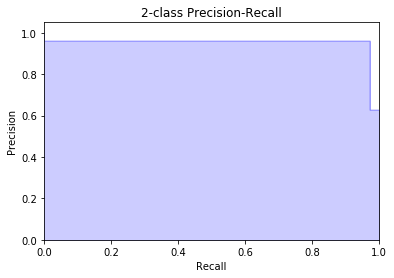

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

average_precision = metrics.average_precision_score(y, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = metrics.precision_recall_curve(y, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall')